<a href="https://colab.research.google.com/github/wagneracarvalho/Mackenzie_APTD/blob/main/Caixeiro_Viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

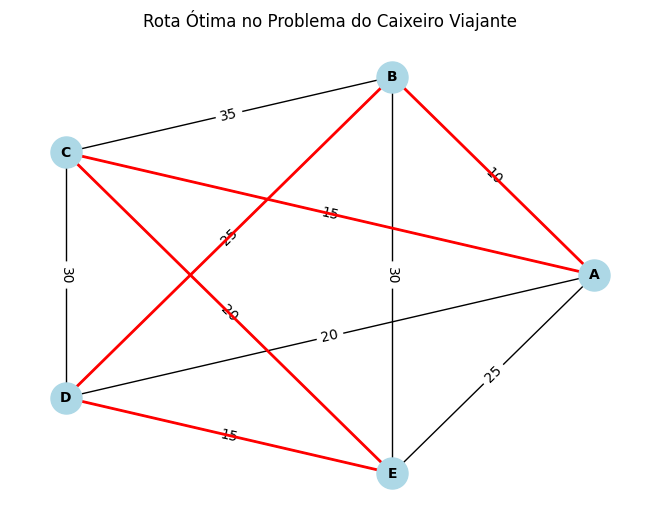

Rota Ótima: A → B → D → E → C → A
Distância Total: 85
Tempo de Execução: 0.000898 segundos


In [17]:
import itertools
import time
import networkx as nx
import matplotlib.pyplot as plt

# Medir o tempo de execução
start_time = time.time()

# Definindo a matriz de distâncias
dist_matrix = [
    [0, 10, 15, 20, 25],  # A
    [10, 0, 35, 25, 30],  # B
    [15, 35, 0, 30, 20],  # C
    [20, 25, 30, 0, 15],  # D
    [25, 30, 20, 15, 0]   # E
]

# Lista de nós/cidades
cities = ['A', 'B', 'C', 'D', 'E']

# Encontrar todas as permutações possíveis (rotas)
permutations = list(itertools.permutations(range(1, len(cities))))  # Fixando a cidade 0 como início e fim
min_distance = float('inf')
best_route = None

# Calcular a distância para cada rota
for perm in permutations:
    # Inicia e termina na cidade 'A' (index 0)
    route = [0] + list(perm) + [0]
    distance = sum(dist_matrix[route[i]][route[i+1]] for i in range(len(route) - 1))

    # Verifica se é a menor distância encontrada
    if distance < min_distance:
        min_distance = distance
        best_route = route

# Converter índices para os nomes das cidades na rota ótima
best_route_cities = [cities[i] for i in best_route]

# Calcular o tempo gasto
end_time = time.time()
execution_time = end_time - start_time

# Criar o grafo usando a biblioteca networkx
G = nx.Graph()

# Adicionar as cidades como nós
for city in cities:
    G.add_node(city)

# Adicionar as arestas com as distâncias
for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        G.add_edge(cities[i], cities[j], weight=dist_matrix[i][j])

# Definir as posições dos nós para uma melhor visualização
pos = nx.circular_layout(G)

# Desenhar o grafo com todas as arestas
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Destacar a rota ótima
optimal_edges = [(best_route_cities[i], best_route_cities[i + 1]) for i in range(len(best_route_cities) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2)

# Mostrar o gráfico
plt.title("Rota Ótima no Problema do Caixeiro Viajante")
plt.show()

# Exibir os resultados
print(f"Rota Ótima: {' → '.join(best_route_cities)}")
print(f"Distância Total: {min_distance}")
print(f"Tempo de Execução: {execution_time:.6f} segundos")
